<a href="https://colab.research.google.com/github/yamsharon102/Computation-Learning---Project/blob/master/runasisIVF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 129.4MB 78kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=90fcb1c8ef3b6c65733a4a6b678439ae1a3e2396925a36dbab55ba2b04e314d7
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpigltjvzo
  JVM stdout: /tmp/tmpigltjvzo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpigltjvzo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    23 days
H2O_cluster_name:           H2O_from_python_unknownUser_gjf5tn
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.180 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.9 final
--------------------------  ------------------------------------------------------------------

In [4]:
#Use to import pandas
import pandas as pd
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io

# This will open a widget when run that will enable you to browse the files on your local storage drive.
uploaded = files.upload()



Saving csv_proc3.csv to csv_proc3.csv


In [6]:
data = pd.read_csv(io.StringIO(uploaded['csv_proc3.csv'].decode('utf-8')))

In [7]:
#df = h2o.import_file("csv_proc3.csv")
#pandas to h2o frame
df = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
from h2o.automl import H2OAutoML


# Identify predictors and response
x = df.columns


In [10]:
y = "HCGTest"
x.remove("HCGTest")
x.remove("beta")
x.remove("GestationalSacs")
x.remove("FetalHeartBeat")
x.remove("LiveBorn")
x.remove("ID")
x.remove("GHTN")
x.remove("GDM")
x.remove("placentapath")
x.remove("IUGR")
x.remove("pretermbirth")
x.remove("LBW")
x.remove("PPROM")



In [12]:
df[y] = df[y].asfactor()

In [13]:
aml = H2OAutoML(max_models=20, seed=1)


In [14]:
aml.train(x=x, y=y, training_frame=df,fold_column="Fold")

AutoML progress: |
08:07:05.995: Fold column Fold will be used for cross-validation. nfolds parameter will be ignored.

████████████████████████████████████████████████████████| 100%


In [17]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
# The leader model is stored here


model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20201022_080705 0.7304 0.604723 0.669772 0.342499 0.457202 0.209034 
 GBM_grid__1_AutoML_20201022_080705_model_1 0.72908 0.632313 0.653464 0.358369 0.463569 0.214896 
 StackedEnsemble_AllModels_AutoML_20201022_080705 0.727581 0.606921 0.664425 0.368148 0.458338 0.210073 
 GBM_3_AutoML_20201022_080705 0.718264 0.652833 0.643889 0.365512 0.469952 0.220855 
 XRT_1_AutoML_20201022_080705 0.711127 0.626404 0.649746 0.377458 0.467215 0.21829 
 DRF_1_AutoML_20201022_080705 0.711126 0.627321 0.644325 0.360217 0.466309 0.217444 
 GBM_2_AutoML_20201022_080705 0.710737 0.655544 0.64541 0.359723 0.473243 0.223959 
 GBM_grid__1_AutoML_20201022_080705_model_2 0.710317 0.643315 0.636989 0.339939 0.470078 0.220973 
 GBM_4_AutoML_20201022_080705 0.701889 0.675965 0.625902 0.336115 0.480077 0.230474 
 GBM_1_AutoML_20201022_080705 0.700761 0.674999 0.623909 0.362224 0.479529 0.229948 
 GLM_1_AutoML_20201022_080705 0.697239 0.631371 0.631243 0.344706 0.469717 0.220634 
 GBM_5_AutoML_20201022_080705 0.683179 0.681003 0.60855 0.372539 0.483959 0.234216 
 XGBoost_grid__1_AutoML_20201022_080705_model_2 0.676255 0.942176 0.598838 0.374781 0.52703 0.277761 
 XGBoost_3_AutoML_20201022_080705 0.67188 0.695355 0.600153 0.384484 0.490633 0.240721 
 XGBoost_grid__1_AutoML_20201022_080705_model_1 0.670256 0.722353 0.624064 0.389009 0.497184 0.247191 
 XGBoost_grid__1_AutoML_20201022_080705_model_4 0.667731 0.690213 0.595083 0.389127 0.490398 0.24049 
 XGBoost_grid__1_AutoML_20201022_080705_model_3 0.666444 0.672927 0.576492 0.401843 0.485702 0.235907 
 DeepLearning_grid__2_AutoML_20201022_080705_model_1 0.657131 1.43903 0.591338 0.410258 0.571679 0.326817 
 XGBoost_1_AutoML_20201022_080705 0.654105 0.727178 0.581944 0.432894 0.502734 0.252742 
 XGBoost_2_AutoML_20201022_080705 0.649366 0.698093 0.574318 0.427005 0.495589 0.245609 
 DeepLearning_grid__1_AutoML_20201022_080705_model_1 0.647376 1.24402 0.589415 0.430158 0.55086 0.303447 
 DeepLearning_1_AutoML_20201022_080705 0.552046 1.59533 0.504168 0.495734 0.650738 0.42346

In [18]:
ll=h2o.get_model("GLM_1_AutoML_20200703_062429")
gbm=h2o.get_model("GBM_4_AutoML_20200703_062429")

H2OResponseError: ignored

In [ ]:
ll.coef_norm()
coeff_table = ll._model_json['output']['coefficients_table']
coeff_table 



Coefficients: glm coefficients


names  coefficients  standardized_coefficients
0                            Intercept    -42.754138                  -0.207419
1                            BirthYear      0.023628                   0.129210
2                           BirthMonth      0.004266                   0.015028
3                                  BMI      0.011201                   0.067028
4                              smoking     -0.158391                  -0.061799
5                         TotalChronic     -0.113479                  -0.076628
6                 Chronic_hypotyrodism      0.252934                   0.080388
7                 Chronic_pre diabitis     -0.336644                  -0.030617
8                   Chronic_diabitis 1     -2.407995                  -0.103576
9                      Chronic_obesity     -0.131230                  -0.057266
10                   Chronic_telesemya     -1.217112                  -0.116627
11                  Chronic_myomectomy     -1.191596                  -0.062744
12  Chronic_impaired glucose tolerance     -1.272959                  -0.067029
13                  Chronic_diabitis 2     -0.624768                  -0.086309
14                        Chronic_APLA      0.821178                   0.070446
15               Chronic_salpindectomy     -0.548883                  -0.094512
16                       Chronic_MTHFR     -1.279800                  -0.067389
17                  Chronic_cystectomy     -0.208225                  -0.025930
18              Chronic_graves disease      0.739797                   0.031821
19                  Chronic_hemophilya      1.252479                   0.065950


See the whole table with table.as_data_frame()


In [ ]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20200703_062429


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               37.0  ...        64.0    46.972973

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0412630140888116
RMSE: 0.20313299606122978
LogLoss: 0.2023654370844313
Mean Per-Class Error: 0.004584018460433104
AUC: 0.9999136394412127
AUCPR: 0.9998977396051176
Gini: 0.9998272788824254

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49883621209919093: 


0      1   Error           Rate
0      0  583.0    3.0  0.0051    (3.0/586.0)
1      1    2.0  492.0   0.004    (2.0/494.0)
2  Total  585.0  495.0  0.0046   (5.0/1080.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.498836    0.994944  198.0
1                        max f2   0.419477    0.997174  203.0
2                  max f0point5   0.534852    0.995918  194.0
3                  max accuracy   0.498836    0.995370  198.0
4                 max precision   0.975980    1.000000    0.0
5                    max recall   0.419477    1.000000  203.0
6               max specificity   0.975980    1.000000    0.0
7              max absolute_mcc   0.498836    0.990676  198.0
8    max min_per_class_accuracy   0.498836    0.994881  198.0
9   max mean_per_class_accuracy   0.498836    0.995416  198.0
10                      max tns   0.975980  586.000000    0.0
11                      max fns   0.975980  493.000000    0.0
12                      max fps   0.020034  586.000000  399.0
13                      max tps   0.419477  494.000000  203.0
14                      max tnr   0.975980    1.000000    0.0
15                      max fnr   0.975980    0.997976    0.0
16                      max fpr   0.020034    1.000000  399.0
17                      max tpr   0.419477    1.000000  203.0


Gains/Lift Table: Avg response rate: 45.74 %, avg score: 45.73 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010185  ...       118.623482            0.022267
1       2                  0.020370  ...       118.623482            0.044534
2       3                  0.030556  ...       118.623482            0.066802
3       4                  0.040741  ...       118.623482            0.089069
4       5                  0.050000  ...       118.623482            0.109312
5       6                  0.100000  ...       118.623482            0.218623
6       7                  0.150000  ...       118.623482            0.327935
7       8                  0.200000  ...       118.623482            0.437247
8       9                  0.300000  ...       118.623482            0.655870
9      10                  0.400000  ...       118.623482            0.874494
10     11                  0.500000  ...       100.000000            0.921502
11     12                  0.600000  ...        66.666667            0.737201
12     13                  0.700000  ...        42.857143            0.552901
13     14                  0.800000  ...        25.000000            0.368601
14     15                  0.900000  ...        11.111111            0.184300
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.20243596289326493
RMSE: 0.4499288420331208
LogLoss: 0.5826894717886951
Mean Per-Class Error: 0.3246189772146302
AUC: 0.7523075541307982
AUCPR: 0.7373860354930256
Gini: 0.5046151082615964

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2835451386245413: 


0      1   Error             Rate
0      0  275.0  311.0  0.5307    (311.0/586.0)
1      1   68.0  426.0  0.1377     (68.0/494.0)
2  Total  343.0  737.0  0.3509   (379.0/1080.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.283545    0.692120  276.0
1                        max f2   0.114723    0.829368  353.0
2                  max f0point5   0.499452    0.652550  182.0
3                  max accuracy   0.499452    0.680556  182.0
4                 max precision   0.979743    1.000000    0.0
5                    max recall   0.068579    1.000000  376.0
6               max specificity   0.979743    1.000000    0.0
7              max absolute_mcc   0.737204    0.372205   80.0
8    max min_per_class_accuracy   0.442007    0.670040  208.0
9   max mean_per_class_accuracy   0.487551    0.675381  188.0
10                      max tns   0.979743  586.000000    0.0
11                      max fns   0.979743  493.000000    0.0
12                      max fps   0.015065  586.000000  399.0
13                      max tps   0.068579  494.000000  376.0
14                      max tnr   0.979743    1.000000    0.0
15                      max fnr   0.979743    0.997976    0.0
16                      max fpr   0.015065    1.000000  399.0
17                      max tpr   0.068579    1.000000  376.0


Gains/Lift Table: Avg response rate: 45.74 %, avg score: 45.16 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010185  ...       118.623482            0.022267
1       2                  0.020370  ...       118.623482            0.044534
2       3                  0.030556  ...       118.623482            0.066802
3       4                  0.040741  ...       118.623482            0.089069
4       5                  0.050000  ...       114.574899            0.105581
5       6                  0.100000  ...       100.404858            0.185046
6       7                  0.150000  ...        92.982456            0.257050
7       8                  0.200000  ...        77.125506            0.284285
8       9                  0.300000  ...        53.171390            0.293985
9      10                  0.400000  ...        45.242915            0.333531
10     11                  0.500000  ...        36.032389            0.332039
11     12                  0.600000  ...        29.554656            0.326816
12     13                  0.700000  ...        24.060150            0.310401
13     14                  0.800000  ...        17.155870            0.252947
14     15                  0.900000  ...         9.761583            0.161916
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_9_valid cv_10_valid
0                  accuracy   0.6667939  ...   0.7346939   0.7322835
1                       auc   0.7521773  ...   0.8017493  0.79954726
2                     aucpr   0.7363769  ...  0.77528065  0.76007885
3                       err   0.3332061  ...  0.26530612  0.26771653
4                 err_count        36.0  ...        26.0        34.0
5                  f0point5   0.6334129  ...   0.7076923   0.6805556
6                        f1  0.70712006  ...    0.779661  0.74242425
7                        f2  0.80182797  ...   0.8679245  0.81666666
8            lift_top_group   2.1951115  ...         2.0    2.267857
9                   logloss   0.5834938  ...   0.5506126  0.52377903
10      max_per_class_error  0.51776075  ...  0.46938777   0.3802817
11                      mcc  0.39393395  ...  0.51416713   0.5010595
12  mean_per_class_accuracy   0.6820918  ...   0.7346939  0.74735916
13     mean_per_class_error  0.31790823  ...  0.26530612  0.25264084
14                      mse  0.20266089  ...  0.18954758   0.1798025
15                   pr_auc   0.7363769  ...  0.77528065  0.76007885
16                precision  0.59261054  ...   0.6666667   0.6447368
17                       r2  0.17871101  ...  0.24180965    0.270615
18                   recall   0.8819443  ...  0.93877554       0.875
19                     rmse  0.44989535  ...  0.43537062  0.42403126

[20 rows x 13 columns]


See the whole table with table.as_data_frame()

Scoring History: 


timestamp  ... training_lift  training_classification_error
0    2020-07-03 06:26:15  ...      1.000000                       0.542593
1    2020-07-03 06:26:15  ...      2.186235                       0.121296
2    2020-07-03 06:26:15  ...      2.186235                       0.081481
3    2020-07-03 06:26:15  ...      2.186235                       0.053704
4    2020-07-03 06:26:15  ...      2.186235                       0.031481
5    2020-07-03 06:26:15  ...      2.186235                       0.015741
6    2020-07-03 06:26:15  ...      2.186235                       0.009259
7    2020-07-03 06:26:16  ...      2.186235                       0.004630
8    2020-07-03 06:26:16  ...      2.186235                       0.004630

[9 rows x 10 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0         twinpreg            70.227592           1.000000    0.064192
1             kid3            57.566589           0.819715    0.052619
2              Age            50.230076           0.715247    0.045913
3              BMI            46.543316           0.662750    0.042543
4             tPNf            37.276592           0.530797    0.034073
5               t7            36.694534           0.522509    0.033541
6            TM-T9            36.001999           0.512647    0.032908
7               LH            33.996117           0.484085    0.031074
8               t4            33.396324           0.475544    0.030526
9         motility            32.014679           0.455870    0.029263
10              e2            30.398247           0.432853    0.027786
11      BirthMonth            30.386538           0.432687    0.027775
12             FSH            30.199427           0.430022    0.027604
13     spermvolume            29.686588           0.422720    0.027135
14           T3-T2            28.430012           0.404827    0.025986
15       BirthYear            27.780712           0.395581    0.025393
16       prolactin            27.533466           0.392061    0.025167
17  motilitybofore            23.540169           0.335198    0.021517
18              t2            22.234295           0.316603    0.020323
19              t5            21.182364           0.301625    0.019362


See the whole table with table.as_data_frame()


In [ ]:
!pip install -q shap

     |████████████████████████████████| 276kB 2.6MB/s 


In [ ]:
import shap
shap.initjs()

#explainer = shap.TreeExplainer(gbm)
#shap_values = explainer.shap_values(cv_data)
#shap_interaction_values = explainer.shap_interaction_values(cv_data)

In [ ]:
shap_values=gbm.predict_contributions(df)

contributions progress: |█████████████████████████████████████████████████| 100%


In [ ]:
xnew=x
#xnew.remove("Fold")
xnew.remove('Chronic_One')
xnew.remove('Chronic_Six')
xnew.remove('Chronic_T22')
xnew.remove('Chronic_myometosis')
xnew.remove('anomaly_neonetal death after sepsis')
xnew.remove('anomaly_Anencephalus')
xnew.remove('anomaly_DawnSyn')
xnew.remove('anomaly_HLHS')
xnew.remove('howman transffered')


In [ ]:
l1=df[xnew].as_data_frame()
l2=shap_values.as_data_frame()
x3=l2.to_numpy()[:,:-1]

(1080, 113)

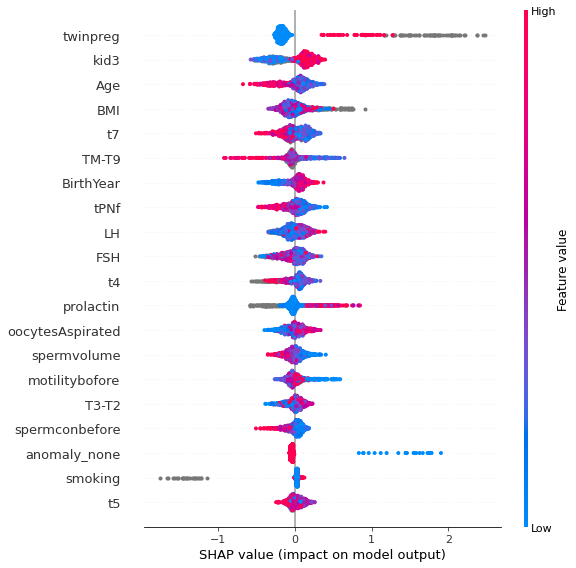

In [ ]:
shap.summary_plot( x3,l1 )

In [ ]:
!pip install -q catboost

     |████████████████████████████████| 64.8MB 53kB/s 


In [ ]:
from catboost import Pool, cv, CatBoostClassifier

cv_data = df.as_data_frame()[x]
#cv_data = df [["LH","Varicocele  (Red=Yes, Blue=No)"]]
labels = df.as_data_frame()[y]

cv_dataset = Pool(data=cv_data,
                  label=labels)

In [ ]:
grid = {"eta": [0.3,0.1,0.05,0.02],
        "depth": [2,4,6,8],
        "min_child_samples" : [5,10],
        "iterations": [100,200,300]
        }

model = CatBoostClassifier(custom_metric=['Logloss',
                                          'AUC:hints=skip_train~false'])

grid_search_result = model.grid_search(grid,
                                       cv_dataset,
                                       plot=True,
                                       refit = True,
                                       cv=10,
                                       partition_random_seed=42)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.5501292871
bestIteration = 39

0:	loss: 0.5501293	best: 0.5501293 (0)	total: 337ms	remaining: 32s

bestTest = 0.5443163885
bestIteration = 95

1:	loss: 0.5443164	best: 0.5443164 (1)	total: 546ms	remaining: 25.6s

bestTest = 0.56418023
bestIteration = 99

2:	loss: 0.5641802	best: 0.5443164 (1)	total: 731ms	remaining: 22.6s

bestTest = 0.5951314434
bestIteration = 99

3:	loss: 0.5951314	best: 0.5443164 (1)	total: 914ms	remaining: 21s

bestTest = 0.5501292871
bestIteration = 39

4:	loss: 0.5501293	best: 0.5443164 (1)	total: 1.3s	remaining: 23.6s

bestTest = 0.5443163885
bestIteration = 95

5:	loss: 0.5443164	best: 0.5443164 (1)	total: 1.67s	remaining: 25s

bestTest = 0.5520321698
bestIteration = 181

6:	loss: 0.5520322	best: 0.5443164 (1)	total: 2.04s	remaining: 25.9s

bestTest = 0.5654735702
bestIteration = 199

7:	loss: 0.5654736	best: 0.5443164 (1)	total: 2.4s	remaining: 26.4s

bestTest = 0.5501292871
bestIteration = 39

8:	loss: 0.5501293	best: 0.5443164 (1)	total: 2.95s

In [ ]:
print(model.get_best_score())

{'learn': {'Logloss': 0.41234002149531535, 'AUC': 0.9387427284409501}}


In [ ]:
grid_search_result['params']

{'depth': 4, 'iterations': 200, 'learning_rate': 0.05, 'min_data_in_leaf': 5}

In [ ]:
grid_search_result['cv_results'].keys()

dict_keys(['iterations', 'test-Logloss-mean', 'test-Logloss-std', 'train-Logloss-mean', 'train-Logloss-std', 'test-AUC-mean', 'test-AUC-std', 'train-AUC-mean', 'train-AUC-std'])

In [ ]:

grid_search_result['cv_results']['test-AUC-mean'][-1]

0.7629613902837582

In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(cv_data)
shap_interaction_values = explainer.shap_interaction_values(cv_data)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
 explainer.expected_value

-0.20078249306701196

In [ ]:
class_names=model.classes_

In [ ]:
print (class_names)

[0 1]


In [ ]:
shap_values

array([[ 0.11023745,  0.02166327,  0.45888426, ..., -0.00482044,
        -0.01422341, -0.01349472],
       [ 0.07770336,  0.02166327, -0.14079527, ..., -0.00482044,
        -0.00740979, -0.01349472],
       [-0.08801313,  0.02166327, -0.14079527, ..., -0.00482044,
        -0.01272938, -0.0247334 ],
       ...,
       [ 0.05993531, -0.00970981, -0.01715812, ..., -0.00252758,
         0.06478019,  0.04417949],
       [ 0.0321307 ,  0.02166327,  0.0699161 , ..., -0.00482044,
         0.07930276,  0.04939751],
       [ 0.03207607,  0.02166327, -0.13011639, ..., -0.00482044,
         0.07598588,  0.04939751]])

In [ ]:
df[x].shape

(1080, 113)

In [ ]:
shap_values.shape

(1080, 113)

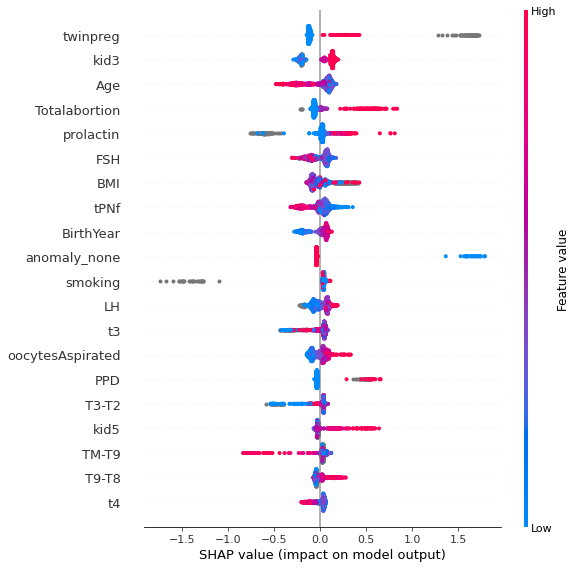

In [ ]:
#shap.summary_plot(shap_interaction_values , df[x],class_names=model.classes_,max_display=30)
shap.summary_plot(shap_values, df.as_data_frame()[x])

In [ ]:
params = {"eta": 0.05,
        "depth": 4,
        "min_child_samples" : 5,
        "iterations": 200,
        "loss_function": "Logloss",
        "custom_metric" : ['Logloss','MCC','Accuracy','Recall','Precision',
                                          'AUC:hints=skip_train~false']
        }

#model = CatBoostClassifier(custom_metric=['Logloss','MCC','Accuracy','Recall','Precision',
#                                          'AUC:hints=skip_train~false'])





scores = cv(cv_dataset, 
            params, 
            fold_count=10,   plot="True",partition_random_seed=42)







MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6827180	test: 0.6841986	best: 0.6841986 (0)	total: 370ms	remaining: 1m 13s
1:	learn: 0.6744291	test: 0.6771955	best: 0.6771955 (1)	total: 686ms	remaining: 1m 7s
2:	learn: 0.6671192	test: 0.6706292	best: 0.6706292 (2)	total: 998ms	remaining: 1m 5s
3:	learn: 0.6619752	test: 0.6668111	best: 0.6668111 (3)	total: 1.31s	remaining: 1m 4s
4:	learn: 0.6551440	test: 0.6609871	best: 0.6609871 (4)	total: 1.64s	remaining: 1m 4s
5:	learn: 0.6510521	test: 0.6582624	best: 0.6582624 (5)	total: 1.96s	remaining: 1m 3s
6:	learn: 0.6468117	test: 0.6550158	best: 0.6550158 (6)	total: 2.27s	remaining: 1m 2s
7:	learn: 0.6426895	test: 0.6513186	best: 0.6513186 (7)	total: 2.59s	remaining: 1m 2s
8:	learn: 0.6379771	test: 0.6475974	best: 0.6475974 (8)	total: 2.91s	remaining: 1m 1s
9:	learn: 0.6335439	test: 0.6439772	best: 0.6439772 (9)	total: 3.22s	remaining: 1m 1s
10:	learn: 0.6298600	test: 0.6409011	best: 0.6409011 (10)	total: 3.54s	remaining: 1m
11:	learn: 0.6258955	test: 0.6377376	best: 0.6377376 (

In [ ]:
scores

iterations  test-Logloss-mean  ...  train-AUC-mean  train-AUC-std
0             0           0.684199  ...        0.699377       0.012637
1             1           0.677196  ...        0.715672       0.007475
2             2           0.670629  ...        0.726775       0.007038
3             3           0.666811  ...        0.731297       0.003969
4             4           0.660987  ...        0.735046       0.006775
..          ...                ...  ...             ...            ...
195         195           0.568556  ...        0.946826       0.003279
196         196           0.568386  ...        0.947322       0.003001
197         197           0.567922  ...        0.947992       0.003019
198         198           0.567780  ...        0.948644       0.002987
199         199           0.568150  ...        0.949250       0.002861

[200 rows x 25 columns]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[9,:20], df[features].iloc[9,:20])

In [ ]:
shap_values[9,:20]

array([ 0.91694662,  0.13089416, -0.23177922, -0.17485112,  0.02947461,
       -0.29772599, -0.19379833,  0.47803224, -0.01814197,  0.04329176,
        0.03551472,  0.01484807, -0.0483501 , -0.74378982,  0.00183248,
        0.        ,  0.09384123,  0.02680093,  0.0231889 ,  0.06873819])

In [ ]:
df[features].iloc[9,:20]

Age                                              50.39726
Ethnicity                                         1.00000
Weight                                                NaN
Height                                                NaN
BMI                                                   NaN
Risk factor of Azoospermia (Red=Yes; Blue=No)     0.00000
Chronic ilness  (Red=Yes; Blue=No)                0.00000
FSH                                               4.80000
LH                                                4.50000
Testosterone total                                4.80000
Smoking  (Red=Yes; Blue=No)                       0.00000
Varicocele  (Red=Yes; Blue=No)                    0.00000
Karyotype  (Red=Yes; Blue=No)                     0.00000
Y microdeltion (Red=Problem; Blue=Ok)                 NaN
C Area problem (Blue-No; Red-Yes)                 0.00000
D Area problem (Blue - No; Red - Yes)             0.00000
Testicular_US_lt                                  3.00000
Testicular_US_

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[11,:20], df[features].iloc[11,:20])

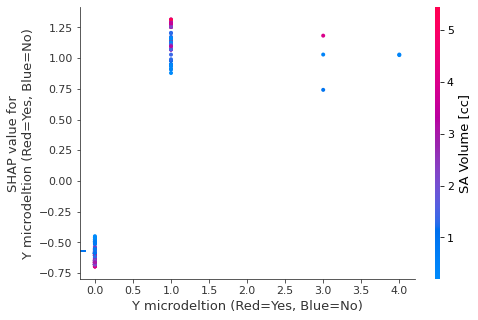

In [ ]:
shap.dependence_plot("Y microdeltion (Red=Yes, Blue=No)", shap_values, df[features], interaction_index="SA Volume [cc]")

In [ ]:
import xgboost
d_train = xgboost.DMatrix(df[features],label=pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found'])





In [ ]:
params = {
    "eta": 0.5,
    "objective": "binary:logistic",
    "subsample": 0.7,
    "max_depth":4,
    "min_child_weight":1,
    "colsample_bytree":0.4,
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 110)


In [ ]:
import shap
shap.initjs()
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[features])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
shap_values.shape

(216, 22)

In [ ]:
xgboost.cv(params, d_train,nfold=10,metrics=["auc"],num_boost_round=20,stratified = False)

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.777914       0.041541       0.613843      0.156774
1         0.861647       0.032119       0.714237      0.082362
2         0.908062       0.019447       0.790837      0.094849
3         0.936091       0.013412       0.809732      0.090014
4         0.955008       0.011487       0.795679      0.087412
5         0.964299       0.009262       0.774386      0.093517
6         0.973940       0.007569       0.791194      0.073931
7         0.979179       0.005481       0.782876      0.079732
8         0.983957       0.005617       0.780271      0.073957
9         0.987697       0.004895       0.790167      0.074946
10        0.989614       0.004618       0.800976      0.067642
11        0.990918       0.005619       0.796787      0.070596
12        0.992137       0.005889       0.783935      0.071561
13        0.993440       0.005645       0.786889      0.058739
14        0.995165       0.003840       0.781730      0.062962
15        0.995551       0.003755       0.779886      0.072991
16        0.996589       0.002988       0.769054      0.050626
17        0.996685       0.003285       0.771023      0.057761
18        0.997620       0.002354       0.771953      0.063663
19        0.998360       0.001780       0.772071      0.075980

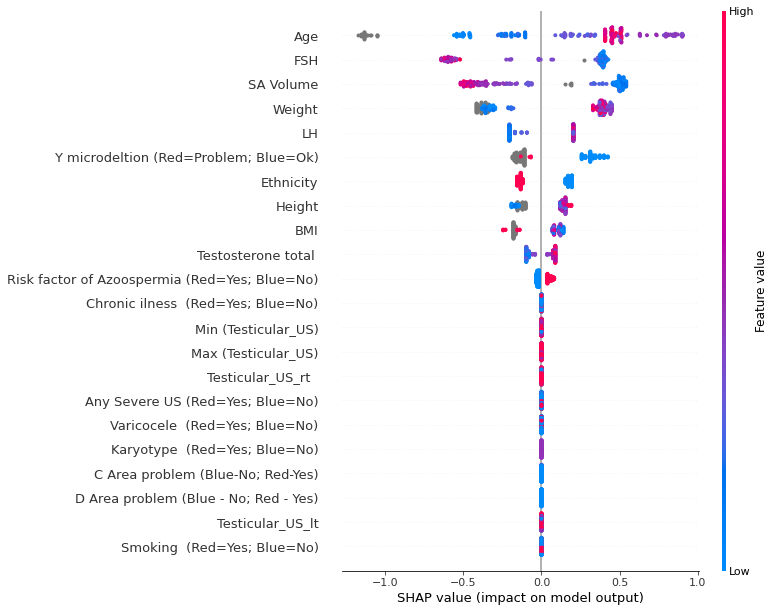

In [ ]:
shap.summary_plot(shap_values, df[features], max_display=50)

In [ ]:
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px

import matplotlib.pylab as pl
import numpy as np



def dependence_plot_classes(feature_name,X_background_display, y_background, shap_values) :
    """
    Create a plot showing relationship between a feature and the shapley values for this feature, colored by the class value.
        Parameters
        ----------
        feature_name : str or int
            Indicate name of the column or the index
        X_background_display : pandas.DataFrame 
            Data frame of feature values (# samples x # features) with non tranformed features values of preference
        y_background : list or np.array
            the classes - can be real or predicted
            
        shap_values : np.array
            shapley values matrx
            
    """
    if isinstance(feature_name, str):
        i = X_background_display.columns.get_loc(feature_name)
    else : 
        i = feature_name
    assert(i not in X_background_display.columns), "Column name not in data frame columns"
    
    a = shap_values[:,i]
    b = X_background_display.iloc[:,i].values
    res = y_background.astype(int).astype(str)

    assert len(a) == len(b)
    y_name = "Shapley values for "+ X_background_display.columns[i]
    x_name = X_background_display.columns[i]
    df = pd.DataFrame({y_name:a,x_name:b,"y_label": res})
    fig = px.scatter(df,  x=x_name, y=y_name, color="y_label", marginal_y="histogram", marginal_x="histogram",width=500, height=500,opacity=0.5)

    fig.show()

In [ ]:
pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found']

0      1
1      1
2      1
3      1
4      1
      ..
211    1
212    1
213    0
214    0
215    0
Name: Class_Found_Yes Found, Length: 216, dtype: uint8

In [ ]:
dependence_plot_classes("SA Volume",df[features],pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found'],shap_values )

In [ ]:
dependence_plot_classes("Age",df[features],pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found'],shap_values )

In [ ]:
dependence_plot_classes("LH",df[features],pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found'],shap_values )

In [ ]:
dependence_plot_classes("BMI",df[features],pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found'],shap_values )

In [ ]:
dependence_plot_classes("FSH",df[features],pd.get_dummies(df, columns=['Class_Found'])['Class_Found_Yes Found'],shap_values )

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8hqyksw8
  JVM stdout: /tmp/tmp8hqyksw8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8hqyksw8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.0.6
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_unknownUser_9uiynn
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.180 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.9 final
--------------------------  ------------------------------------------------------------------

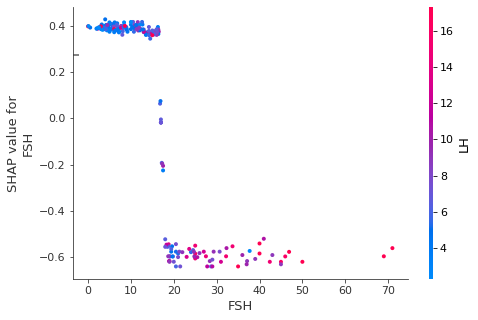

In [ ]:
shap.dependence_plot("FSH", shap_values, df[features], interaction_index="LH")

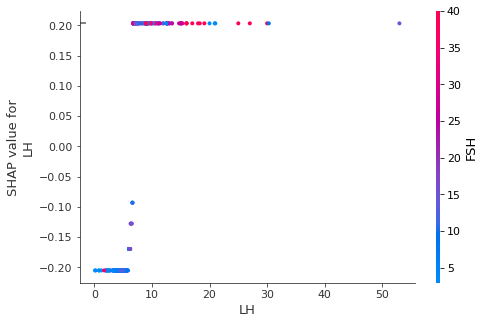

In [ ]:
shap.dependence_plot("LH", shap_values, df[features], interaction_index="FSH")

In [ ]:
df = h2o.import_file("Data_To_Use3.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
!pip install -q shap

     |████████████████████████████████| 276kB 2.9MB/s 


NameError: ignored

In [ ]:
df["Class_Found"] = df["Class_Found"].asfactor()
predictors = df.columns[0:22]
response = "Class_Found"
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#train, valid = cars.split_frame(ratios=[.8], seed=1234)
my_gbm = H2OGradientBoostingEstimator(build_tree_one_node=True,
                                        seed=1234,nfolds=10,ntrees=100,max_depth=4,learn_rate=0.5,stopping_metric="AUC",stopping_rounds = 10)




In [ ]:
my_gbm.train(x=predictors,
               y=response,training_frame=df)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
print(my_gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1592308011203_5454


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               28.0  ...        13.0          9.0

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00020051877173570597
RMSE: 0.014160465096023717
LogLoss: 0.00889291337859448
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9638726617342511: 


No Found  Yes Found Error          Rate
0   No Found      41.0        0.0   0.0    (0.0/41.0)
1  Yes Found       0.0      175.0   0.0   (0.0/175.0)
2      Total      41.0      175.0   0.0   (0.0/216.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.963873    1.000000  174.0
1                        max f2   0.963873    1.000000  174.0
2                  max f0point5   0.963873    1.000000  174.0
3                  max accuracy   0.963873    1.000000  174.0
4                 max precision   0.999989    1.000000    0.0
5                    max recall   0.963873    1.000000  174.0
6               max specificity   0.999989    1.000000    0.0
7              max absolute_mcc   0.963873    1.000000  174.0
8    max min_per_class_accuracy   0.963873    1.000000  174.0
9   max mean_per_class_accuracy   0.963873    1.000000  174.0
10                      max tns   0.999989   41.000000    0.0
11                      max fns   0.999989  174.000000    0.0
12                      max fps   0.000169   41.000000  215.0
13                      max tps   0.963873  175.000000  174.0
14                      max tnr   0.999989    1.000000    0.0
15                      max fnr   0.999989    0.994286    0.0
16                      max fpr   0.000169    1.000000  215.0
17                      max tpr   0.963873    1.000000  174.0


Gains/Lift Table: Avg response rate: 81.02 %, avg score: 80.99 %


group  ...        gain  cumulative_gain
0         1  ...   23.428571        23.428571
1         2  ...   23.428571        23.428571
2         3  ...   23.428571        23.428571
3         4  ...   23.428571        23.428571
4         5  ...   23.428571        23.428571
5         6  ...   23.428571        23.428571
6         7  ...   23.428571        23.428571
7         8  ...   23.428571        23.428571
8         9  ...   23.428571        23.428571
9        10  ...   23.428571        23.428571
10       11  ...   23.428571        23.428571
11       12  ...   23.428571        23.428571
12       13  ...   23.428571        23.428571
13       14  ...   23.428571        23.428571
14       15  ...  -88.244898        11.340206
15       16  ... -100.000000         0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.149151037239492
RMSE: 0.3862007732248759
LogLoss: 0.6788558462964135
Mean Per-Class Error: 0.3334494773519163
AUC: 0.7318466898954704
AUCPR: 0.9158771932097843
Gini: 0.46369337979094083

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.037118695126341535: 


No Found  Yes Found   Error           Rate
0   No Found      10.0       31.0  0.7561    (31.0/41.0)
1  Yes Found       2.0      173.0  0.0114    (2.0/175.0)
2      Total      12.0      204.0  0.1528   (33.0/216.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.037119    0.912929  203.0
1                        max f2   0.009193    0.962596  208.0
2                  max f0point5   0.523541    0.882353  189.0
3                  max accuracy   0.229788    0.847222  197.0
4                 max precision   1.000000    1.000000    0.0
5                    max recall   0.009193    1.000000  208.0
6               max specificity   1.000000    1.000000    0.0
7              max absolute_mcc   0.229788    0.409346  197.0
8    max min_per_class_accuracy   0.977796    0.640000  125.0
9   max mean_per_class_accuracy   0.523541    0.666551  189.0
10                      max tns   1.000000   41.000000    0.0
11                      max fns   1.000000  174.000000    0.0
12                      max fps   0.000093   41.000000  215.0
13                      max tps   0.009193  175.000000  208.0
14                      max tnr   1.000000    1.000000    0.0
15                      max fnr   1.000000    0.994286    0.0
16                      max fpr   0.000093    1.000000  215.0
17                      max tpr   0.009193    1.000000  208.0


Gains/Lift Table: Avg response rate: 81.02 %, avg score: 85.11 %


group  ...       gain  cumulative_gain
0         1  ...  23.428571        23.428571
1         2  ...  23.428571        23.428571
2         3  ...  23.428571        23.428571
3         4  ...  23.428571        23.428571
4         5  ...  23.428571        23.428571
5         6  ...  12.207792        17.818182
6         7  ...  23.428571        19.688312
7         8  ...  12.207792        17.818182
8         9  ...  17.551020        17.731868
9        10  ...  -4.623377        12.078818
10       11  ...  -0.081633         9.714286
11       12  ...   6.597403         9.186813
12       13  ... -11.836735         6.263009
13       14  ...  12.207792         7.018993
14       15  ...  -0.081633         6.250368
15       16  ... -55.116883         0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_9_valid  cv_10_valid
0                  accuracy    0.8865868  ...        0.75          1.0
1                       auc   0.68211824  ...   0.8080808          1.0
2                     aucpr     0.916245  ...   0.8309785          1.0
3                       err   0.11341321  ...        0.25          0.0
4                 err_count          2.5  ...         5.0          0.0
5                  f0point5   0.89751565  ...  0.73333335          1.0
6                        f1    0.9289883  ...   0.8148148          1.0
7                        f2   0.96478677  ...   0.9166667          1.0
8            lift_top_group    1.1645186  ...   1.8181819    1.1666666
9                   logloss    0.6672235  ...  0.97179896  0.094605096
10      max_per_class_error    0.6024603  ...   0.5555556          0.0
11                      mcc    0.6618583  ...   0.5527708          1.0
12  mean_per_class_accuracy   0.69460315  ...   0.7222222          1.0
13     mean_per_class_error   0.30539683  ...   0.2777778          0.0
14                      mse   0.14677855  ...  0.22983438  0.028852154
15                   pr_auc     0.916245  ...   0.8309785          1.0
16                precision   0.87848955  ...      0.6875          1.0
17                       r2  -0.28036314  ...  0.07137628    0.7643741
18                   recall    0.9916667  ...         1.0          1.0
19                     rmse   0.36847594  ...  0.47941044   0.16985922

[20 rows x 13 columns]


See the whole table with table.as_data_frame()

Scoring History: 


timestamp  ... training_lift  training_classification_error
0     2020-06-16 14:25:44  ...      1.000000                       0.189815
1     2020-06-16 14:25:44  ...      1.234286                       0.157407
2     2020-06-16 14:25:44  ...      1.234286                       0.129630
3     2020-06-16 14:25:44  ...      1.234286                       0.097222
4     2020-06-16 14:25:44  ...      1.234286                       0.064815
5     2020-06-16 14:25:44  ...      1.234286                       0.050926
6     2020-06-16 14:25:44  ...      1.234286                       0.032407
7     2020-06-16 14:25:44  ...      1.234286                       0.018519
8     2020-06-16 14:25:44  ...      1.234286                       0.018519
9     2020-06-16 14:25:44  ...      1.234286                       0.009259
10    2020-06-16 14:25:44  ...      1.234286                       0.004630
11    2020-06-16 14:25:44  ...      1.234286                       0.004630
12    2020-06-16 14:25:44  ...      1.234286                       0.004630
13    2020-06-16 14:25:44  ...      1.234286                       0.004630
14    2020-06-16 14:25:44  ...      1.234286                       0.000000
15    2020-06-16 14:25:44  ...      1.234286                       0.000000
16    2020-06-16 14:25:44  ...      1.234286                       0.000000
17    2020-06-16 14:25:44  ...      1.234286                       0.000000
18    2020-06-16 14:25:44  ...      1.234286                       0.000000
19    2020-06-16 14:25:44  ...      1.234286                       0.000000

[20 rows x 10 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                                             Age  ...    0.284484
1           Y microdeltion (Red=Problem; Blue=Ok)  ...    0.159328
2                             Testosterone total   ...    0.128353
3                                       SA Volume  ...    0.090271
4                                             FSH  ...    0.062208
5   Risk factor of Azoospermia (Red=Yes; Blue=No)  ...    0.061961
6                                          Height  ...    0.050837
7                                              LH  ...    0.049674
8                                          Weight  ...    0.040717
9                                             BMI  ...    0.040241
10                                      Ethnicity  ...    0.010104
11                               Testicular_US_lt  ...    0.005941
12                            Min (Testicular_US)  ...    0.005471
13                            Max (Testicular_US)  ...    0.004681
14                             Testicular_US_rt    ...    0.002943
15             Chronic ilness  (Red=Yes; Blue=No)  ...    0.001556
16                 Varicocele  (Red=Yes; Blue=No)  ...    0.000661
17                    Smoking  (Red=Yes; Blue=No)  ...    0.000569
18                  Karyotype  (Red=Yes; Blue=No)  ...    0.000000
19              C Area problem (Blue-No; Red-Yes)  ...    0.000000

[20 rows x 4 columns]


See the whole table with table.as_data_frame()



In [ ]:

#print(my_gbm.auc(valid=True))
shap_values=my_gbm.predict_contributions(df)
#predict_contributions

contributions progress: |█████████████████████████████████████████████████| 100%


In [ ]:
#type(shap_values[:,0:22])
type(as_data_frame(df[:,0:22]))

NameError: ignored

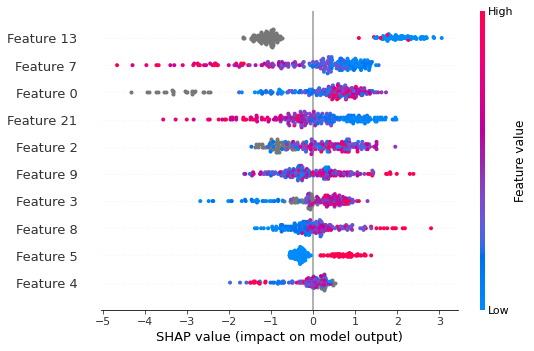

In [ ]:
import shap
shap.initjs()

ll=shap_values[:,0:22].as_data_frame().to_numpy()
mm=df[:,0:22].as_data_frame().to_numpy()
type(mm)
#ll.shape
#mm.shape
shap.summary_plot(ll, mm, max_display=10)


In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# initialize the estimator
gbm_cov = H2OGradientBoostingEstimator( build_tree_one_node=False,huber_alpha=0.9, tweedie_power=1.5,quantile_alpha=0.5,distribution= "bernoulli", balance_classes=False , score_each_iteration=True, nfolds=10)

# set up hyper parameter search space
gbm_hyper_params = {'learn_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
                     'max_depth': [3, 5, 7, 9, 12],
                     'sample_rate': [i * 0.1 for i in range(6, 11)],
                     'col_sample_rate': [i * 0.1 for i in range(6, 11)],
                     'ntrees': [i * 50 for i in range(1, 11)]
                }

# define Search criteria
gbm_search_criteria = {'strategy': "RandomDiscrete", 
                        'max_models': 100, 
                        'max_runtime_secs': 1800,
                        'stopping_metric': "AUC", 
                        'stopping_tolerance': 0.001, 
                        'stopping_rounds': 3,
                        'seed': -3748930324277865345
                       }

# build grid search 
gbm_grid = H2OGridSearch(model = gbm_cov,
                     hyper_params = gbm_hyper_params,
                     search_criteria = gbm_search_criteria # we can use "Cartesian" if search space is small
                    )

# train using the grid
gbm_grid.train(x=predictors,
               y=response,training_frame=df)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
gbm_grid[0]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_9_sid_9df8_model_python_1592308011203_69027_model_24


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              150.0  ...        18.0    13.566667

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06517097062163081
RMSE: 0.2552860564575175
LogLoss: 0.23867484655872898
Mean Per-Class Error: 0.02933797909407665
AUC: 0.9921951219512195
AUCPR: 0.9982179146726741
Gini: 0.984390243902439

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.711624279744148: 


No Found  Yes Found   Error          Rate
0   No Found      39.0        2.0  0.0488    (2.0/41.0)
1  Yes Found       4.0      171.0  0.0229   (4.0/175.0)
2      Total      43.0      173.0  0.0278   (6.0/216.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.711624    0.982759  171.0
1                        max f2   0.645259    0.984073  177.0
2                  max f0point5   0.739863    0.988304  168.0
3                  max accuracy   0.711624    0.972222  171.0
4                 max precision   0.957539    1.000000    0.0
5                    max recall   0.572090    1.000000  190.0
6               max specificity   0.957539    1.000000    0.0
7              max absolute_mcc   0.711624    0.911740  171.0
8    max min_per_class_accuracy   0.739863    0.965714  168.0
9   max mean_per_class_accuracy   0.739863    0.970662  168.0
10                      max tns   0.957539   41.000000    0.0
11                      max fns   0.957539  174.000000    0.0
12                      max fps   0.232944   41.000000  214.0
13                      max tps   0.572090  175.000000  190.0
14                      max tnr   0.957539    1.000000    0.0
15                      max fnr   0.957539    0.994286    0.0
16                      max fpr   0.232944    1.000000  214.0
17                      max tpr   0.572090    1.000000  190.0


Gains/Lift Table: Avg response rate: 81.02 %, avg score: 80.99 %


group  ...        gain  cumulative_gain
0         1  ...   23.428571        23.428571
1         2  ...   23.428571        23.428571
2         3  ...   23.428571        23.428571
3         4  ...   23.428571        23.428571
4         5  ...   23.428571        23.428571
5         6  ...   23.428571        23.428571
6         7  ...   23.428571        23.428571
7         8  ...   23.428571        23.428571
8         9  ...   23.428571        23.428571
9        10  ...   23.428571        23.428571
10       11  ...   23.428571        23.428571
11       12  ...   23.428571        23.428571
12       13  ...   23.428571        23.428571
13       14  ...   12.207792        22.001652
14       15  ...  -76.489796        11.340206
15       16  ... -100.000000         0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.11668724133087362
RMSE: 0.34159514242868505
LogLoss: 0.373462354698565
Mean Per-Class Error: 0.25163763066202094
AUC: 0.8234146341463414
AUCPR: 0.9533593695237921
Gini: 0.6468292682926828

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3681102829176371: 


No Found  Yes Found   Error           Rate
0   No Found       9.0       32.0  0.7805    (32.0/41.0)
1  Yes Found       0.0      175.0     0.0    (0.0/175.0)
2      Total       9.0      207.0  0.1481   (32.0/216.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.368110    0.916230  206.0
1                        max f2   0.368110    0.964719  206.0
2                  max f0point5   0.655835    0.890710  184.0
3                  max accuracy   0.368110    0.851852  206.0
4                 max precision   0.959091    1.000000    0.0
5                    max recall   0.368110    1.000000  206.0
6               max specificity   0.959091    1.000000    0.0
7              max absolute_mcc   0.655835    0.441641  184.0
8    max min_per_class_accuracy   0.828701    0.707317  135.0
9   max mean_per_class_accuracy   0.865237    0.748362  107.0
10                      max tns   0.959091   41.000000    0.0
11                      max fns   0.959091  174.000000    0.0
12                      max fps   0.257068   41.000000  215.0
13                      max tps   0.368110  175.000000  206.0
14                      max tnr   0.959091    1.000000    0.0
15                      max fnr   0.959091    0.994286    0.0
16                      max fpr   0.257068    1.000000  215.0
17                      max tpr   0.368110    1.000000  206.0


Gains/Lift Table: Avg response rate: 81.02 %, avg score: 81.21 %


group  ...       gain  cumulative_gain
0         1  ...  23.428571        23.428571
1         2  ...  23.428571        23.428571
2         3  ...  23.428571        23.428571
3         4  ...  23.428571        23.428571
4         5  ...  23.428571        23.428571
5         6  ...  23.428571        23.428571
6         7  ...  23.428571        23.428571
7         8  ...  23.428571        23.428571
8         9  ...  23.428571        23.428571
9        10  ...   6.597403        19.172414
10       11  ...  17.551020        18.857143
11       12  ... -15.844156        12.984615
12       13  ...   5.795918        11.984863
13       14  ...  -4.623377         9.872832
14       15  ... -23.591837         6.250368
15       16  ... -55.116883         0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_9_valid  cv_10_valid
0                  accuracy   0.90715075  ...   0.7777778   0.88461536
1                       auc     0.845362  ...   0.5873016    0.8095238
2                     aucpr    0.9565407  ...   0.8553145    0.9470623
3                       err   0.09284927  ...  0.22222222  0.115384616
4                 err_count          2.2  ...         6.0          3.0
5                  f0point5   0.92152244  ...  0.81395346    0.8974359
6                        f1    0.9451163  ...       0.875   0.93333334
7                        f2    0.9706794  ...   0.9459459    0.9722222
8            lift_top_group    1.2371341  ...   1.2857143    1.2380953
9                   logloss   0.36471552  ...   0.5838794     0.357665
10      max_per_class_error   0.44166666  ...         1.0          0.6
11                      mcc    0.7170811  ...         NaN     0.591608
12  mean_per_class_accuracy    0.7736607  ...         0.5          0.7
13     mean_per_class_error   0.22633928  ...         0.5          0.3
14                      mse  0.114118956  ...  0.19639419   0.10547054
15                   pr_auc    0.9565407  ...   0.8553145    0.9470623
16                precision    0.9067475  ...   0.7777778        0.875
17                       r2    0.2321194  ...  -0.1362807    0.3209706
18                   recall    0.9889881  ...         1.0          1.0
19                     rmse   0.33370903  ...  0.44316384   0.32476228

[20 rows x 13 columns]


See the whole table with table.as_data_frame()

Scoring History: 


timestamp  ... training_lift  training_classification_error
0     2020-06-16 18:41:40  ...      1.000000                       0.189815
1     2020-06-16 18:41:40  ...      1.234286                       0.157407
2     2020-06-16 18:41:40  ...      1.234286                       0.157407
3     2020-06-16 18:41:40  ...      1.234286                       0.148148
4     2020-06-16 18:41:40  ...      1.234286                       0.148148
5     2020-06-16 18:41:40  ...      1.234286                       0.115741
6     2020-06-16 18:41:40  ...      1.234286                       0.115741
7     2020-06-16 18:41:40  ...      1.234286                       0.115741
8     2020-06-16 18:41:40  ...      1.234286                       0.115741
9     2020-06-16 18:41:40  ...      1.234286                       0.120370
10    2020-06-16 18:41:40  ...      1.234286                       0.120370
11    2020-06-16 18:41:40  ...      1.234286                       0.111111
12    2020-06-16 18:41:40  ...      1.234286                       0.111111
13    2020-06-16 18:41:40  ...      1.234286                       0.111111
14    2020-06-16 18:41:40  ...      1.234286                       0.111111
15    2020-06-16 18:41:40  ...      1.234286                       0.111111
16    2020-06-16 18:41:40  ...      1.234286                       0.111111
17    2020-06-16 18:41:40  ...      1.234286                       0.106481
18    2020-06-16 18:41:40  ...      1.234286                       0.106481
19    2020-06-16 18:41:40  ...      1.234286                       0.092593

[20 rows x 10 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                                             Age  ...    0.404725
1           Y microdeltion (Red=Problem; Blue=Ok)  ...    0.168822
2                                       SA Volume  ...    0.117983
3   Risk factor of Azoospermia (Red=Yes; Blue=No)  ...    0.060192
4                                             FSH  ...    0.045788
5                                          Height  ...    0.036148
6                                          Weight  ...    0.036116
7                                              LH  ...    0.032219
8                             Testosterone total   ...    0.024757
9                                             BMI  ...    0.019409
10                                      Ethnicity  ...    0.016422
11                               Testicular_US_lt  ...    0.010584
12                            Min (Testicular_US)  ...    0.007800
13                    Smoking  (Red=Yes; Blue=No)  ...    0.006816
14               Any Severe US (Red=Yes; Blue=No)  ...    0.003753
15                             Testicular_US_rt    ...    0.002893
16                            Max (Testicular_US)  ...    0.002204
17             Chronic ilness  (Red=Yes; Blue=No)  ...    0.002078
18                 Varicocele  (Red=Yes; Blue=No)  ...    0.001290
19                  Karyotype  (Red=Yes; Blue=No)  ...    0.000000

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


contributions progress: |█████████████████████████████████████████████████| 100%


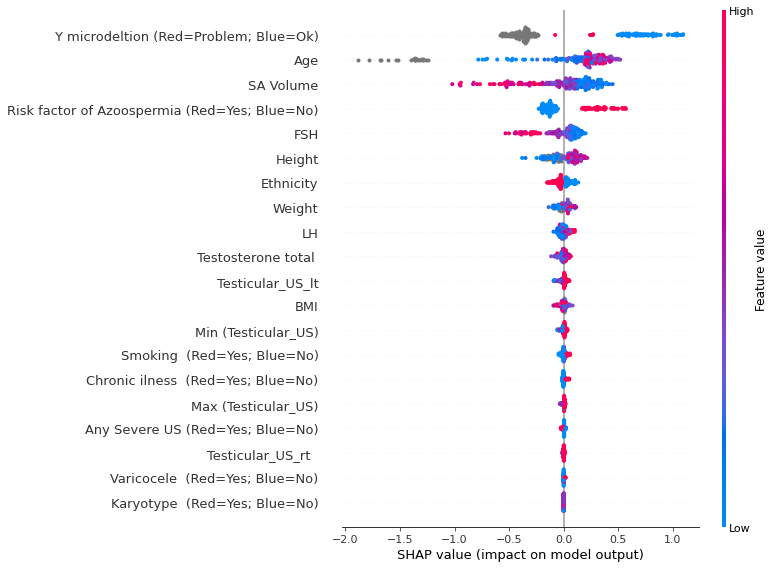

In [ ]:
import shap
shap.initjs()
shap_values=gbm_grid[0].predict_contributions(df)

ll=shap_values[:,0:22].as_data_frame().to_numpy()
mm=df[:,0:22].as_data_frame().to_numpy()
type(mm)
#ll.shape
#mm.shape
shap.summary_plot(ll, mm, max_display=20,feature_names=df.col_names[0:22])





contributions progress: |█████████████████████████████████████████████████| 100%


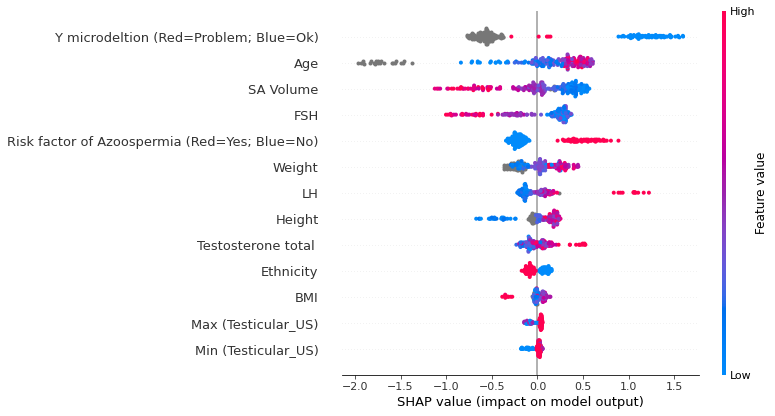

In [ ]:
import shap
shap.initjs()
shap_values=gbm_grid[1].predict_contributions(df)

ll=shap_values[:,0:22].as_data_frame().to_numpy()
mm=df[:,0:22].as_data_frame().to_numpy()
type(mm)
#ll.shape
#mm.shape
shap.summary_plot(ll, mm, max_display=13,feature_names=df.col_names[0:22])

In [ ]:
df2=pd.read_csv("Data_To_Use3.csv")
yy=pd.get_dummies(df["Class_Found"].as_data_frame())['Class_Found_Yes Found']

dependence_plot_classes("SA Volume",df2[features],yy,ll )

In [ ]:
shap.initjs()
import matplotlib.pyplot as plt

shap.force_plot(explainer.expected_value,ll[11,:20], df2[features].iloc[11,:20],plot_cmap=['#00bfff','#ff0b00'])

In [ ]:
df_preg = pd.read_csv("Data_To_UseForPregnancy.csv")


In [ ]:
featuresPref = df_preg.drop(["ClassPregnancy"],axis=1).columns

In [ ]:
categorical_cols = ["Class_Found"]
cat_features = [df_preg[featuresPref].columns.get_loc("Class_Found")]

cv_data_preg = df_preg[featuresPref]

labels_preg = df_preg['ClassPregnancy']

cv_dataset_preg = Pool(data=cv_data_preg,
                  label=labels_preg,cat_features=cat_features)

In [ ]:
grid = {"eta": [0.1,0.05,0.02],
        "depth": [2,5],
        "min_child_samples" : [5,10],
        "iterations": [100]
        }

model_preg = CatBoostClassifier(custom_metric=["AUC","Logloss"])

grid_search_result = model_preg.grid_search(grid,
                                       cv_dataset_preg,
                                       plot=True,
                                       refit = True,
                                       cv=10,
                                       partition_random_seed=42)

print(model_preg.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.6328145416
bestIteration = 73

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.6328145	best: 0.6328145 (0)	total: 146ms	remaining: 1.6s

bestTest = 0.6437789407
bestIteration = 94

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.6437789	best: 0.6328145 (0)	total: 254ms	remaining: 1.27s

bestTest = 0.6564753395
bestIteration = 77

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.6564753	best: 0.6328145 (0)	total: 352ms	remaining: 1.05s

bestTest = 0.5799801909
bestIteration = 54

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.5799802	best: 0.5799802 (3)	total: 550ms	remaining: 1.1s

bestTest 

In [ ]:
import shap
shap.initjs()

explainer_preg = shap.TreeExplainer(model_preg)
shap_values_preg = explainer_preg.shap_values(cv_dataset_preg)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


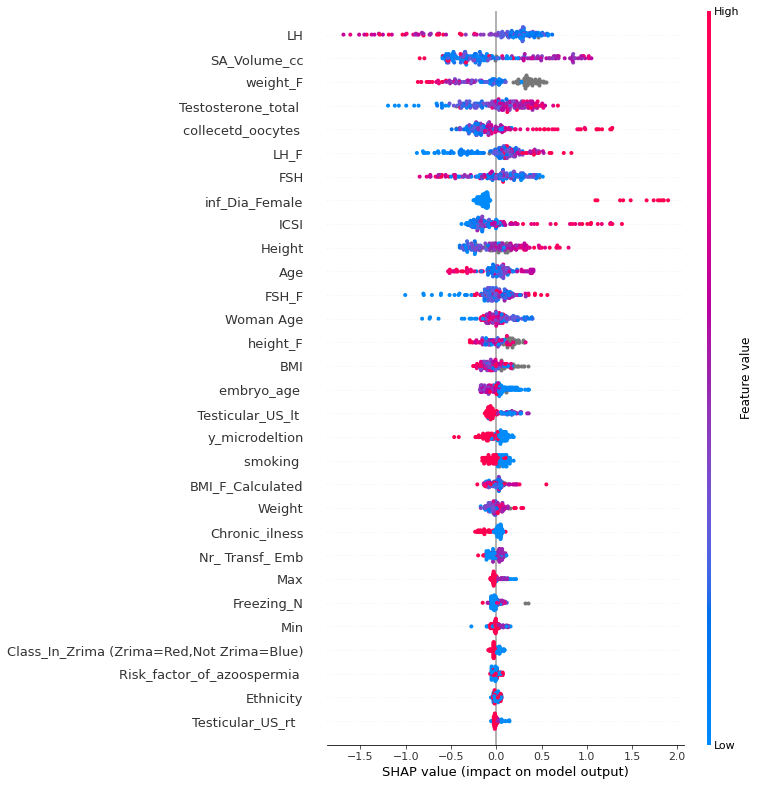

In [ ]:
shap.summary_plot(shap_values_preg, df_preg[featuresPref], max_display=30)